 #  **Traditional Energy Portfolio Data**
 ---
### This portfolio include energy stocks for fossil fuel and hydroelectrical companies.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import csv


from matplotlib import pyplot as plt
%matplotlib inline

### Stocks Trad_Energy

In [2]:
Trad_Energy = Path("../../Data/Trad_Energy_Stocks.csv")
Trad_Energy_df = pd.read_csv(Trad_Energy)

Trad_Energy_df.head(10) 

,Symbol,Description,Exchange,Sector,Industry,Last Trade,% Change,Volume,Market Cap (B),Market_Cap_W,Dividend Yield,Divid_Yield_W,10 Years Return,Stock_Ret_W,iqual weighted
0,SPY,Spdr S&P 500,NYSE ARCA,--,--,390.03,-0.18,"83,240,971",340.71,1.00,1.46,1.00,2.84,1.00,1.000000
1,BP,Bp Plc F,NYSE,Energy,"Oil, Gas & Consumable Fuels",22.87,1.83,"12,257,667",78.24,0.12,6.91,0.19,0.64,0.05,0.142857
2,COP,Conocophillips,NYSE,Energy,"Oil, Gas & Consumable Fuels",48.40,1.53,"8,502,536",66.05,0.10,3.55,0.10,1.62,0.13,0.142857
3,CVX,Chevron Corp,NYSE,Energy,"Oil, Gas & Consumable Fuels",96.00,0.84,"8,913,854",179.31,0.27,5.38,0.15,1.52,0.12,0.142857
4,EQNR,Equinor A S A F,NYSE,Energy,"Oil, Gas & Consumable Fuels",18.00,0.34,"3,541,655",59.64,0.09,3.11,0.09,0.77,0.06,0.142857
5,OKE,Oneok Inc,NYSE,Energy,"Oil, Gas & Consumable Fuels",45.50,2.14,"2,050,428",20.42,0.03,8.22,0.23,3.79,0.31,0.142857
6,PXD,Pioneer Natural Res,NYSE,Energy,"Oil, Gas & Consumable Fuels",133.94,0.70,"2,257,083",29.48,0.05,1.67,0.05,2.97,0.24,0.142857
7,XOM,Exxon Mobil Corp,NYSE,Energy,"Oil, Gas & Consumable Fuels",52.43,0.67,"22,607,163",220.29,0.34,6.64,0.19,1.01,0.08,0.142857
8,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,653.43,1.00,35.48,1.00,12.33,1.00,1.000000
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Weight Distribution

In [3]:
# Create Scenaries DataFrame

# Set the tickers
Stocks = ['BP', 'COP', 'CVX', 'EQNR', 'OKE', 'PXD', 'XOM']


# Set current amount of shares data
iqual_Dist = {
    "iqual_Dist": [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7]}

Market_Cap_Dist = {
    "Market_Cap_Dist": [0.12, 0.10, 0.27, 0.09, 0.03, 0.05, 0.34]}

Divid_Yield_Dist = {
    "Divid_Yield_Dist": [0.19, 0.10, 0.15, 0.09, 0.23, 0.05, 0.19]}

Ten_Years_Return_Dist = {
    "Ten_Years_Return_Dist": [0.06, 0.13, 0.12, 0.06, 0.31, 0.24, 0.08]}


# Create the shares DataFrame
df_TE_iqual = pd.DataFrame(iqual_Dist, index=Stocks)
df_TE_MC = pd.DataFrame(Market_Cap_Dist, index=Stocks)
df_TE_DY = pd.DataFrame(Divid_Yield_Dist, index=Stocks)
df_TE_Ret = pd.DataFrame(Ten_Years_Return_Dist, index=Stocks)
   

###  **Data Cleaning**

In [4]:
# Reading .csv returns
PATH3 = Path("../../Data/TRADITIONAL_ENERGY_Portfolio.csv")
TRAD_ENR = pd.read_csv(PATH3, index_col="Date", infer_datetime_format=True, parse_dates=True)

TRAD_ENR.head()  

,BP,COP,CVX,EQNR,OKE,PXD,XOM
Date,,,,,,,
2010-01-04,59.15,40.08,79.06,25.89,19.95,50.98,69.15
2010-01-05,59.57,40.12,79.62,25.89,19.78,51.00,69.42
2010-01-06,59.88,40.41,79.63,26.12,19.89,51.89,70.02
2010-01-07,59.86,40.25,79.33,25.98,19.76,52.35,69.80
2010-01-08,60.00,40.60,79.47,26.16,19.87,53.25,69.52


In [5]:
# Checking file information:
TRAD_ENR.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BP      2516 non-null   float64
 1   COP     2516 non-null   float64
 2   CVX     2516 non-null   float64
 3   EQNR    2516 non-null   float64
 4   OKE     2516 non-null   float64
 5   PXD     2516 non-null   float64
 6   XOM     2516 non-null   float64
dtypes: float64(7)
memory usage: 157.2 KB


In [6]:
# Count nulls
TRAD_ENR.isnull().sum()

BP      0
COP     0
CVX     0
EQNR    0
OKE     0
PXD     0
XOM     0
dtype: int64

In [7]:
# Drop nulls
TRAD_ENR = TRAD_ENR.dropna()

In [8]:
# Validating all nulls have been dropped
TRAD_ENR.isnull().sum()

BP      0
COP     0
CVX     0
EQNR    0
OKE     0
PXD     0
XOM     0
dtype: int64

In [9]:
TRAD_ENR.head()

,BP,COP,CVX,EQNR,OKE,PXD,XOM
Date,,,,,,,
2010-01-04,59.15,40.08,79.06,25.89,19.95,50.98,69.15
2010-01-05,59.57,40.12,79.62,25.89,19.78,51.00,69.42
2010-01-06,59.88,40.41,79.63,26.12,19.89,51.89,70.02
2010-01-07,59.86,40.25,79.33,25.98,19.76,52.35,69.80
2010-01-08,60.00,40.60,79.47,26.16,19.87,53.25,69.52


In [10]:
# Daily Return
TRAD_ENR_returned = TRAD_ENR.pct_change()
TRAD_ENR_return = TRAD_ENR_returned.dropna()
TRAD_ENR_return.head()

,BP,COP,CVX,EQNR,OKE,PXD,XOM
Date,,,,,,,
2010-01-05,0.007101,0.000998,0.007083,0.000000,-0.008521,0.000392,0.003905
2010-01-06,0.005204,0.007228,0.000126,0.008884,0.005561,0.017451,0.008643
2010-01-07,-0.000334,-0.003959,-0.003767,-0.005360,-0.006536,0.008865,-0.003142
2010-01-08,0.002339,0.008696,0.001765,0.006928,0.005567,0.017192,-0.004011
2010-01-11,0.031500,0.005911,0.017743,0.011850,0.022144,-0.018216,0.011220


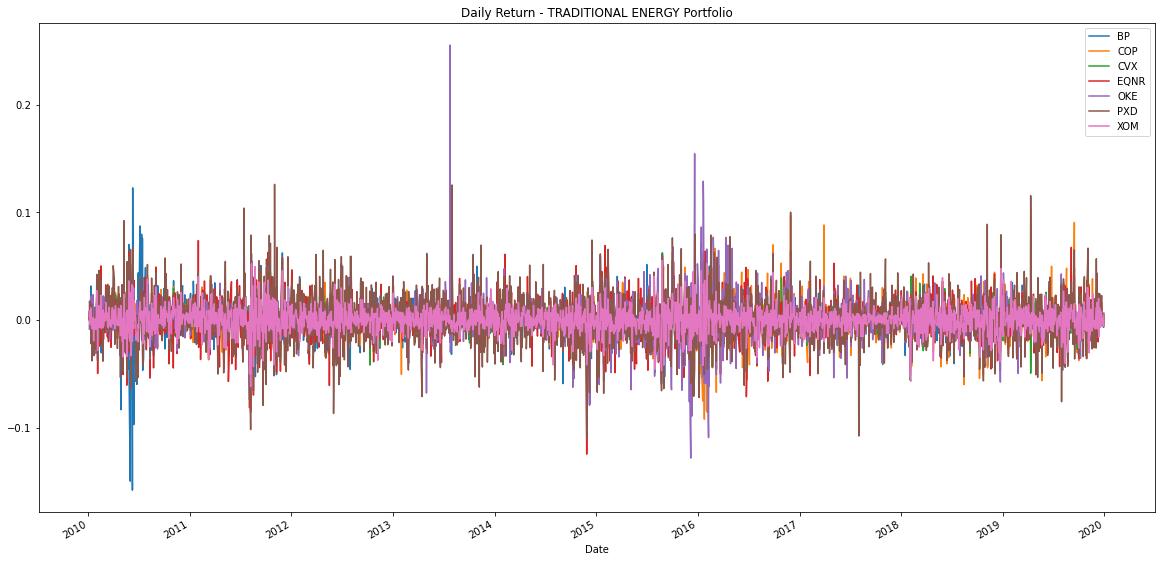

In [11]:
TRAD_ENR_return.plot(figsize=(20,10), title = "Daily Return - TRADITIONAL ENERGY Portfolio");

In [12]:
# Cumulative Return
TRAD_ENR_cum_return = (1 + TRAD_ENR_return).cumprod()
TRAD_ENR_cum_return.tail()

,BP,COP,CVX,EQNR,OKE,PXD,XOM
Date,,,,,,,
2019-12-24,0.643111,1.613523,1.522135,0.764002,3.789474,2.977638,1.012581
2019-12-26,0.642096,1.621756,1.525424,0.768637,3.816040,2.983131,1.014172
2019-12-27,0.640068,1.621257,1.521629,0.767478,3.794987,2.977246,1.010701
2019-12-30,0.635672,1.612026,1.515937,0.765933,3.780451,2.959396,1.004772
2019-12-31,0.638039,1.622505,1.524285,0.769023,3.792982,2.969204,1.009111


In [13]:
TRAD_ENR_cum_return.sum()

BP      1747.502451
COP     3560.500998
CVX     3419.328485
EQNR    2124.023947
OKE     5792.641103
PXD     6810.097097
XOM     2995.621547
dtype: float64

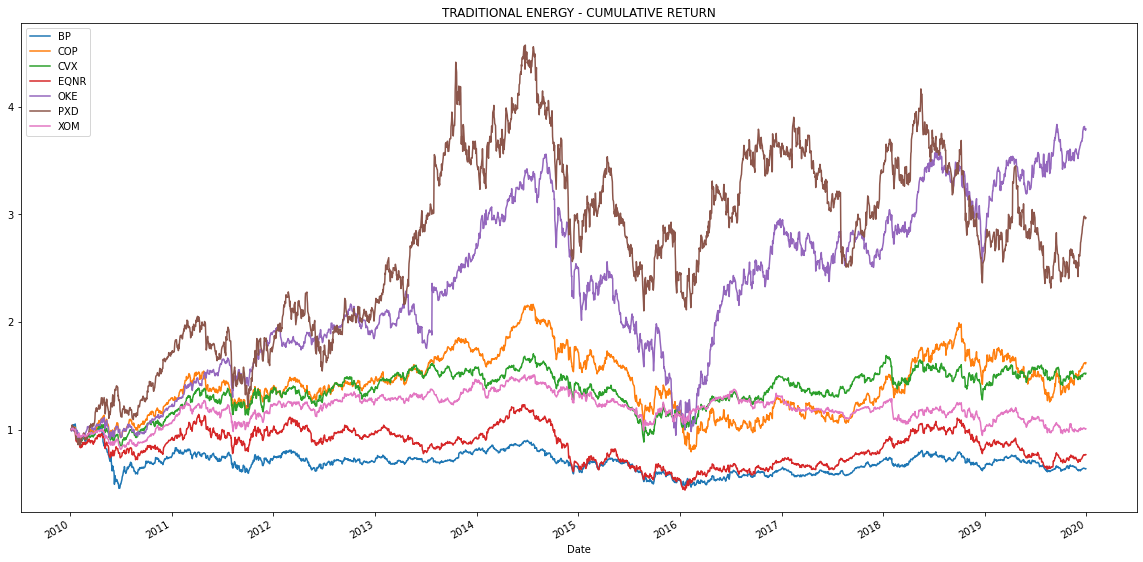

In [14]:
TRAD_ENR_cum_return.plot(figsize=(20,10), title = "TRADITIONAL ENERGY - CUMULATIVE RETURN");

## **S&P 500 Returns**

**Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.**

In [15]:
# Reading S&P 500 Closing Prices
spy = Path("../../Data/SPY_close.csv")
spy = pd.read_csv(spy, index_col="Date", infer_datetime_format=True, parse_dates=True)

spy.head()

,SPY
Date,
2010-01-04,113.33
2010-01-05,113.63
2010-01-06,113.71
2010-01-07,114.19
2010-01-08,114.57


In [16]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [17]:
# Fix Data Typesaa
spy['SPY'] = spy['SPY'].astype('float')
spy['SPY'].dtype

dtype('float64')

In [18]:
# Calculate Daily Returns
spy_return = spy.pct_change()
spy_return.head()

,SPY
Date,
2010-01-04,NaN
2010-01-05,0.002647
2010-01-06,0.000704
2010-01-07,0.004221
2010-01-08,0.003328


In [19]:
# Drop nulls
spy_return = spy_return.dropna()

In [20]:
# Checking file information:
spy_return.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2010-01-05 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     2515 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


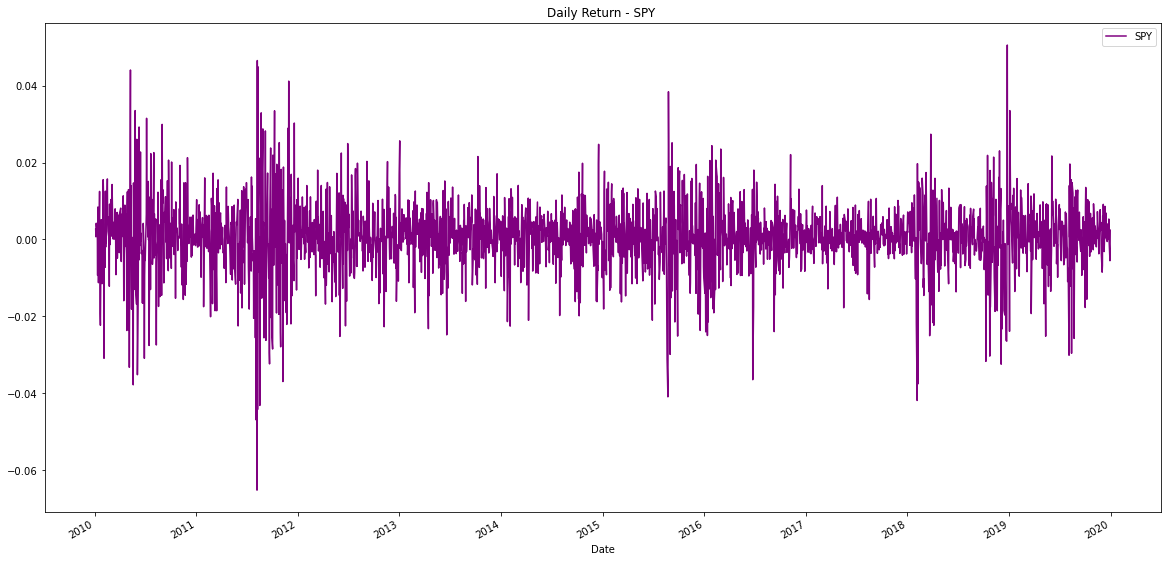

In [21]:
spy_return.plot(figsize=(20,10), title = "Daily Return - SPY ", color = 'purple');

In [22]:
# Cumulative Return
spy_cum_return = (1 + spy_return).cumprod()
spy_cum_return.tail()

,SPY
Date,
2019-12-24,2.834466
2019-12-26,2.849554
2019-12-27,2.848848
2019-12-30,2.833142
2019-12-31,2.840025


In [23]:
spy_cum_return.sum()

SPY    4356.110915
dtype: float64

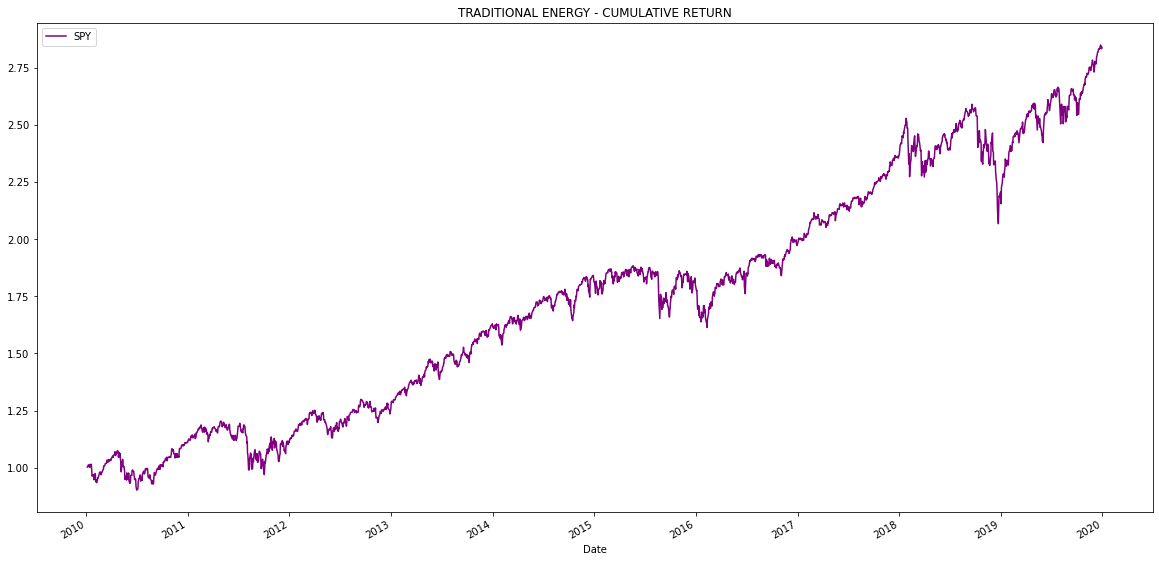

In [24]:
spy_cum_return.plot(figsize=(20,10), title = "TRADITIONAL ENERGY - CUMULATIVE RETURN", color= 'purple');

# Portfolio Analysis

### Setting Porfotlios different Weights

,iqual_Dist,Market_Cap_Dist
BP,0.142857,0.12
COP,0.142857,0.10
CVX,0.142857,0.27
EQNR,0.142857,0.09
OKE,0.142857,0.03
PXD,0.142857,0.05
XOM,0.142857,0.34


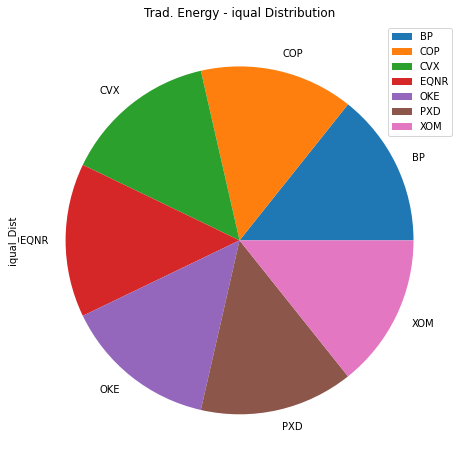

In [25]:
# Display savings DataFrame
display(df_TE_iqual)
# Plot savings pie chart
df_TE_iqual.plot.pie(y="iqual_Dist", title="Trad. Energy - iqual Distribution", figsize=(8,8));

In [26]:
# Set iqual weight
weights = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7]

# Calculate portfolio return
PORT_TE_EqualyWeighted = TRAD_ENR_return.dot(weights)

# Display sample data

 
PORT_TE_EqualyWeighted.head()

Date
2010-01-05    0.001565
2010-01-06    0.007585
2010-01-07   -0.002033
2010-01-08    0.005496
2010-01-11    0.011736
dtype: float64

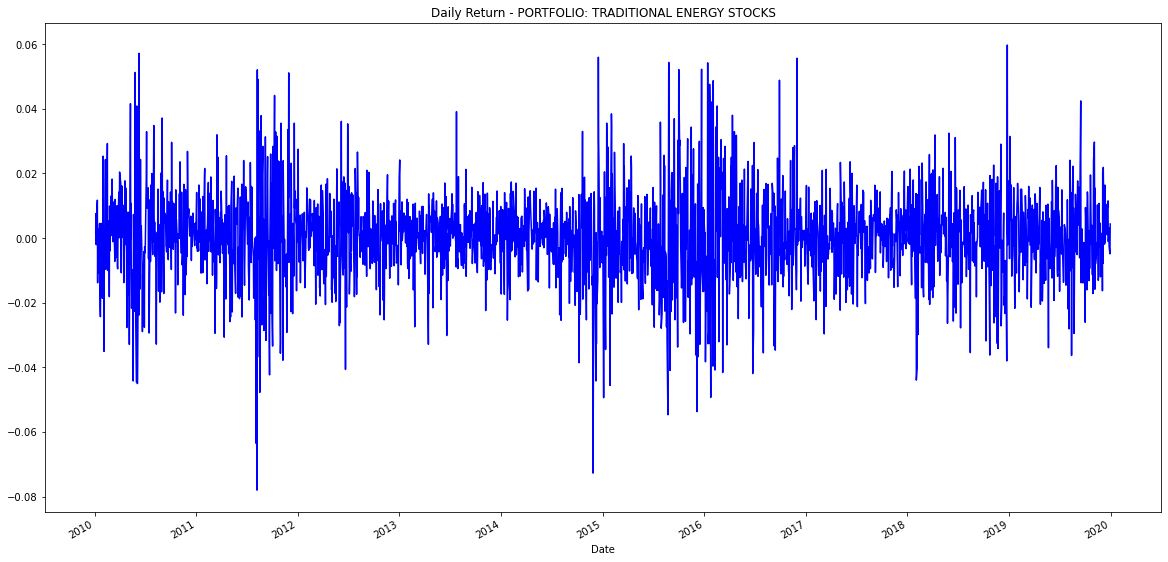

In [27]:
PORT_TE_EqualyWeighted.plot(figsize=(20,10), title = "Daily Return - PORTFOLIO: TRADITIONAL ENERGY STOCKS", color = 'blue');

,Market_Cap_Dist
BP,0.12
COP,0.10
CVX,0.27
EQNR,0.09
OKE,0.03
PXD,0.05
XOM,0.34


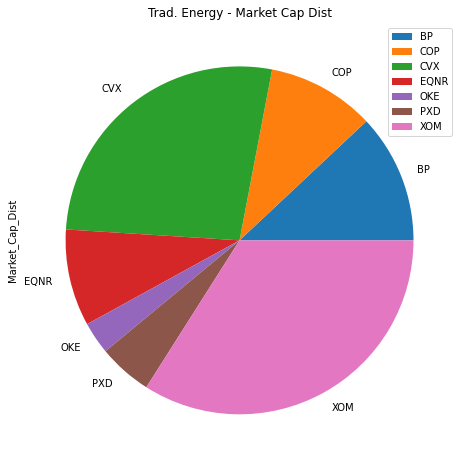

In [28]:
# Display savings DataFrame
display(df_TE_MC)
# Plot savings pie chart
df_TE_MC.plot.pie(y="Market_Cap_Dist", title="Trad. Energy - Market Cap Dist", figsize=(8,8));

In [29]:
# Set weight by Market Capital
weights = [0.12, 0.10, 0.27, 0.09, 0.03, 0.05, 0.34]

# Calculate portfolio return
PORT_TE_M_Cap_Weighted = TRAD_ENR_return.dot(weights)

# Display sample data

 
PORT_TE_M_Cap_Weighted.head()

Date
2010-01-05    0.003956
2010-01-06    0.006159
2010-01-07   -0.002757
2010-01-08    0.001913
2010-01-11    0.013796
dtype: float64

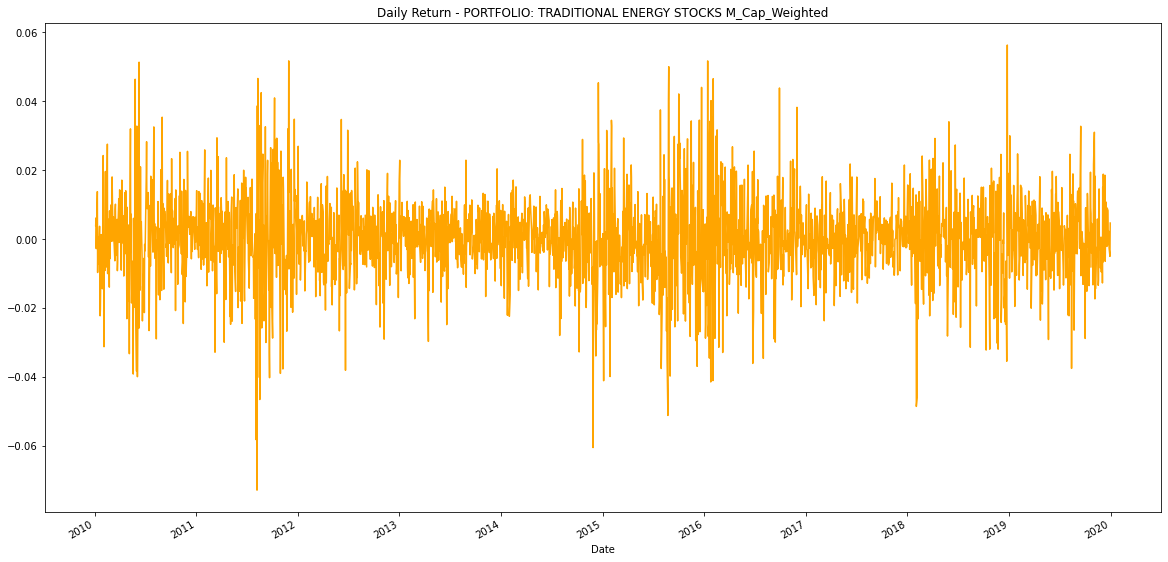

In [30]:
PORT_TE_M_Cap_Weighted.plot(figsize=(20,10), title = "Daily Return - PORTFOLIO: TRADITIONAL ENERGY STOCKS M_Cap_Weighted", color="orange");

,Divid_Yield_Dist
BP,0.19
COP,0.10
CVX,0.15
EQNR,0.09
OKE,0.23
PXD,0.05
XOM,0.19


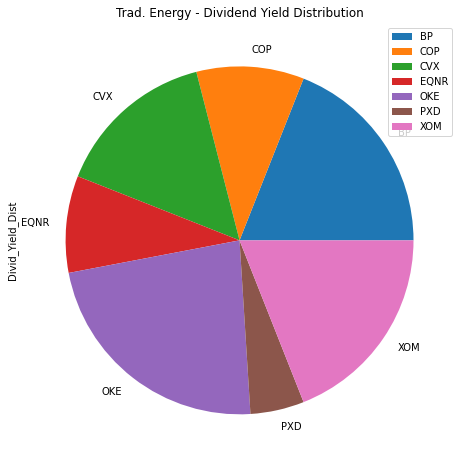

In [31]:
# Display savings DataFrame
display(df_TE_DY)
# Plot savings pie chart
df_TE_DY.plot.pie(y="Divid_Yield_Dist", title="Trad. Energy - Dividend Yield Distribution",figsize=(8,8));

In [32]:
# Set weight by Dividend Yield
weights = [0.19, 0.10, 0.15, 0.09, 0.23, 0.05, 0.19]

# Calculate portfolio return
PORT_TE_Dividend_Weighted = TRAD_ENR_return.dot(weights)
1
# Display sample data

 
PORT_TE_Dividend_Weighted.head()

Date
2010-01-05    0.001313
2010-01-06    0.006324
2010-01-07   -0.003164
2010-01-08    0.003580
2010-01-11    0.016618
dtype: float64

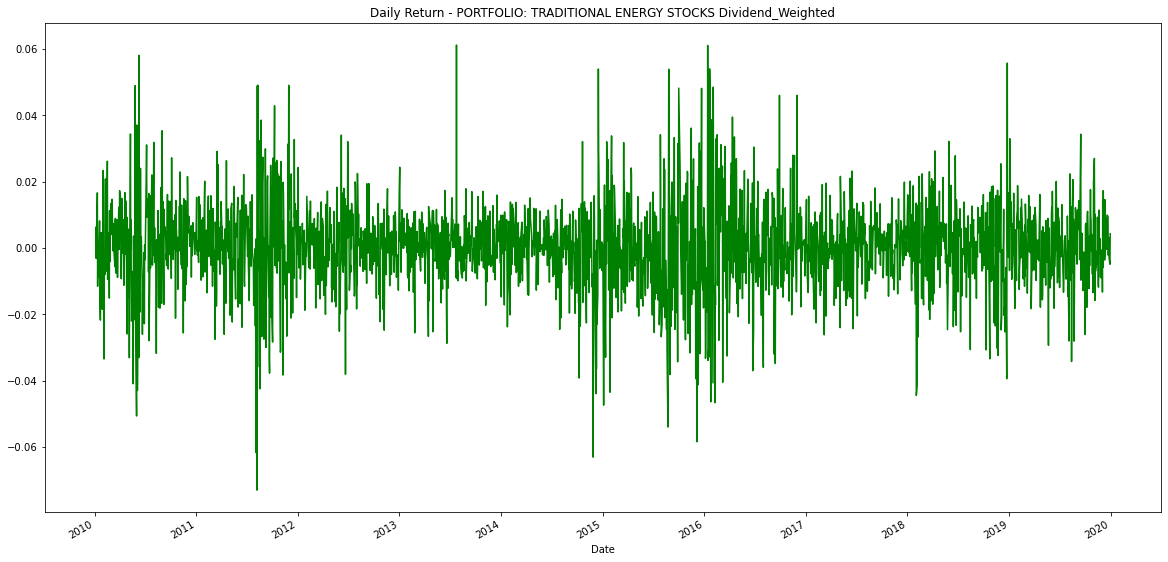

In [33]:
PORT_TE_Dividend_Weighted.plot(figsize=(20,10), title = "Daily Return - PORTFOLIO: TRADITIONAL ENERGY STOCKS Dividend_Weighted", color='green');

,Ten_Years_Return_Dist
BP,0.06
COP,0.13
CVX,0.12
EQNR,0.06
OKE,0.31
PXD,0.24
XOM,0.08


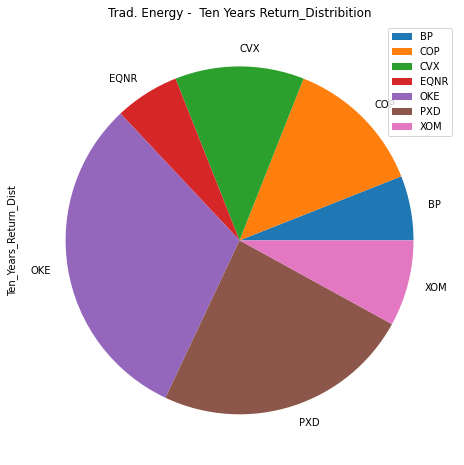

In [34]:
# Display savings DataFrame
display(df_TE_Ret)
# Plot savings pie chart
df_TE_Ret.plot.pie(y="Ten_Years_Return_Dist", title="Trad. Energy -  Ten Years Return_Distribition",figsize=(8,8));

In [35]:
# Set weight by 10 Years Return
weights = [0.06, 0.13, 0.12, 0.06, 0.31, 0.24, 0.08]

# Calculate portfolio return
PORT_TE_10Y_return_Weighted = TRAD_ENR_return.dot(weights)

# Display sample data

 
PORT_TE_10Y_return_Weighted.head()

Date
2010-01-05   -0.000829
2010-01-06    0.008404
2010-01-07   -0.001458
2010-01-08    0.007429
2010-01-11    0.008889
dtype: float64

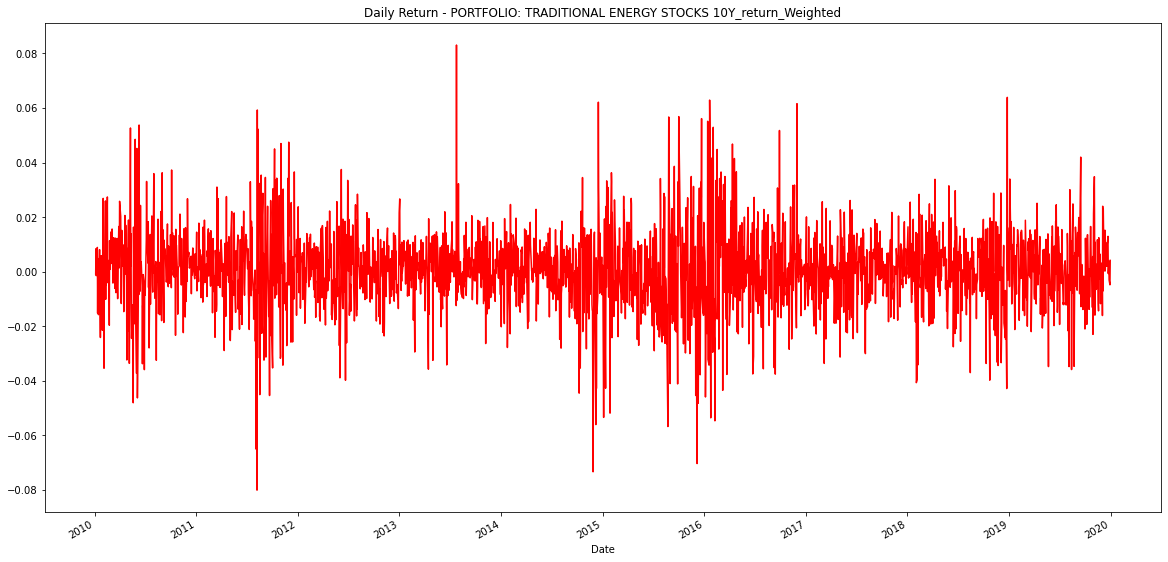

In [36]:
PORT_TE_10Y_return_Weighted.plot(figsize=(20,10), title = "Daily Return - PORTFOLIO: TRADITIONAL ENERGY STOCKS 10Y_return_Weighted", color ='red');

## **COMBINING TRADICIONAL ENERGY STOCKS PORTFOLIO AND S&P 500 Returns**

In [37]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_trad = pd.concat([PORT_TE_EqualyWeighted, PORT_TE_M_Cap_Weighted, PORT_TE_Dividend_Weighted, PORT_TE_10Y_return_Weighted,spy_return], axis="columns", join="inner")

combined_trad.columns = ['PORT_TE_EqualyWeighted','PORT_TE_M_Cap_Weighted', 'PORT_TE_Dividend_Weighted', 'PORT_TE_10Y_return_Weighted', 'SPY']
combined_trad.head()



,PORT_TE_EqualyWeighted,PORT_TE_M_Cap_Weighted,PORT_TE_Dividend_Weighted,PORT_TE_10Y_return_Weighted,SPY
Date,,,,,
2010-01-05,0.001565,0.003956,0.001313,-0.000829,0.002647
2010-01-06,0.007585,0.006159,0.006324,0.008404,0.000704
2010-01-07,-0.002033,-0.002757,-0.003164,-0.001458,0.004221
2010-01-08,0.005496,0.001913,0.003580,0.007429,0.003328
2010-01-11,0.011736,0.013796,0.016618,0.008889,0.001397


---

# **Conduct Quantitative Analysis**

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## **Performance Anlysis**

#### **Calculate and Plot the daily returns.**

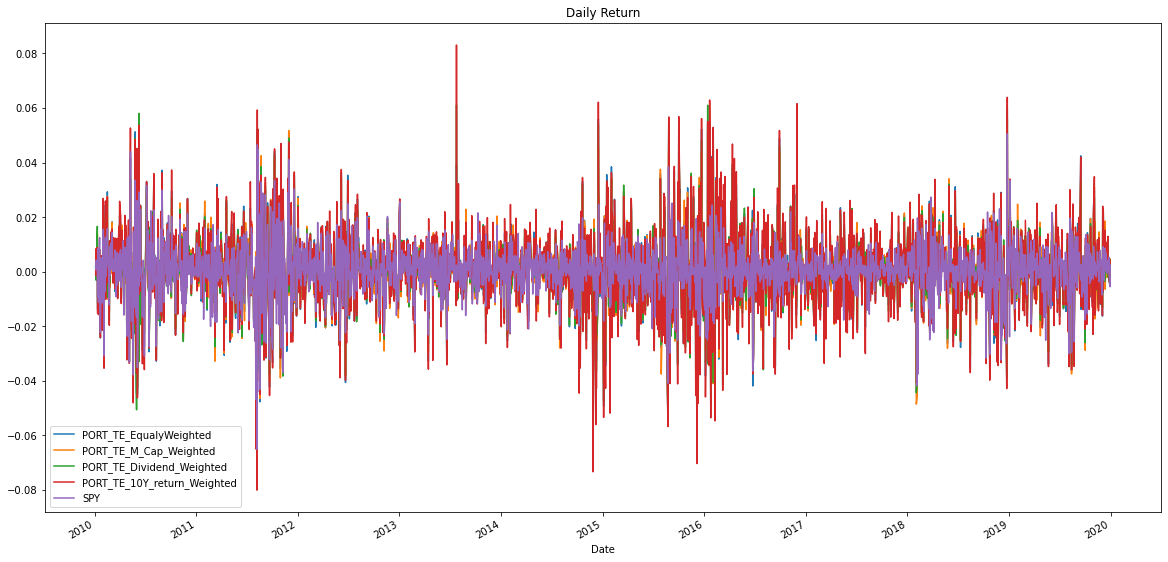

In [38]:
# Plot daily returns of all portfolios
combined_trad.plot(figsize=(20,10), title = "Daily Return").legend(loc='lower left');

#### **Calculate and Plot cumulative returns.**

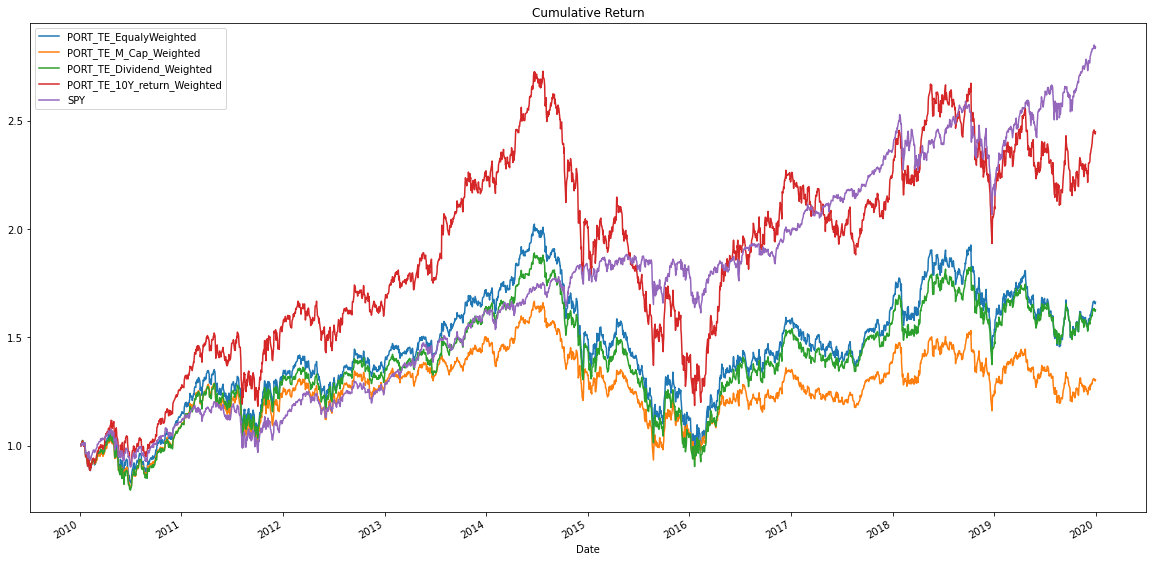

In [39]:
# Calculate cumulative returns of all portfolios
#cumulative_returns = (1 + daily_returns).cumprod()
#cumulative_returns.head()
# Plot cumulative returns
cumulative_returns = (1 + combined_trad).cumprod()
cumulative_returns.plot(figsize=(20,10), title = "Cumulative Return");

In [40]:
cumulative_returns.tail()

,PORT_TE_EqualyWeighted,PORT_TE_M_Cap_Weighted,PORT_TE_Dividend_Weighted,PORT_TE_10Y_return_Weighted,SPY
Date,,,,,
2019-12-24,1.662872,1.306315,1.628778,2.448532,2.834466
2019-12-26,1.668141,1.309303,1.633800,2.458164,2.849554
2019-12-27,1.663762,1.305840,1.628641,2.450602,2.848848
2019-12-30,1.655679,1.299318,1.620642,2.438796,2.833142
2019-12-31,1.662943,1.305399,1.627603,2.448892,2.840025


### Cumulative Return Plot: In this graph we can see portfolios Algo_1 and BH_Inc have cumulative returns bigger than S&P 500, being Algo_1 the one with the Highest cumulative return over all, and P_G_Co_Inc the portfolio with the lowest cumulative return over all.

---

## **Risk Analysis**

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### **Create a box plot for each portfolio**


PORT_TE_M_Cap_Weighted         0.000184
PORT_TE_Dividend_Weighted      0.000281
PORT_TE_EqualyWeighted         0.000298
SPY                            0.000458
PORT_TE_10Y_return_Weighted    0.000468
dtype: float64

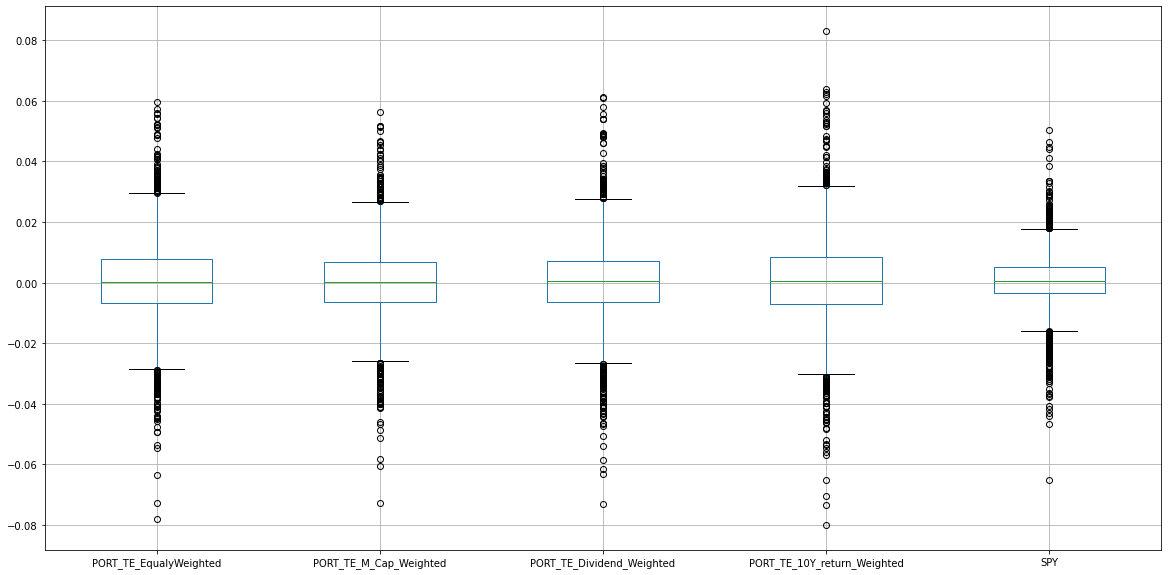

In [41]:
# Box plot to visually show risk

combined_trad.boxplot(figsize=(20,10));
combined_trad.mean().sort_values()

### The stocks with higher volatility are NC, WMB, OKE . The stocks with lighter volatility are XOM ans CVX

### **Calculate Standard Deviations**


In [42]:
# Calculate the daily standard deviations of all portfolios
#from daily_returns
combined_trad.dropna().head()

,PORT_TE_EqualyWeighted,PORT_TE_M_Cap_Weighted,PORT_TE_Dividend_Weighted,PORT_TE_10Y_return_Weighted,SPY
Date,,,,,
2010-01-05,0.001565,0.003956,0.001313,-0.000829,0.002647
2010-01-06,0.007585,0.006159,0.006324,0.008404,0.000704
2010-01-07,-0.002033,-0.002757,-0.003164,-0.001458,0.004221
2010-01-08,0.005496,0.001913,0.003580,0.007429,0.003328
2010-01-11,0.011736,0.013796,0.016618,0.008889,0.001397


In [43]:
#Standar daily deviation
daily_std = combined_trad.std().sort_values()  
daily_std 

SPY                            0.009275
PORT_TE_M_Cap_Weighted         0.012490
PORT_TE_Dividend_Weighted      0.013199
PORT_TE_EqualyWeighted         0.013849
PORT_TE_10Y_return_Weighted    0.014932
dtype: float64

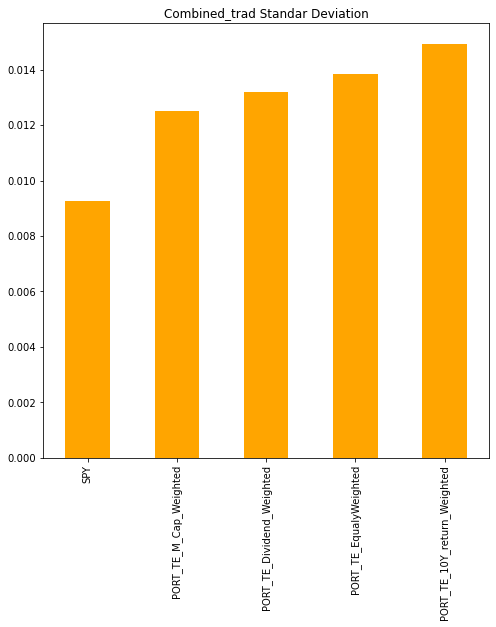

In [44]:
daily_std.plot(kind="bar", title="Combined_trad Standar Deviation", color="orange", figsize = (8,8));

### **Determine which portfolios are riskier than the S&P 500**

In [45]:
# Calculate  the daily standard deviation of S&P 500
spy_std = combined_trad['SPY'].std()
print("S&P500 Daily Standar Deviation = ", spy_std)

S&P500 Daily Standar Deviation =  0.009275049495769192


In [46]:
combined_trad.std() > spy_std

PORT_TE_EqualyWeighted          True
PORT_TE_M_Cap_Weighted          True
PORT_TE_Dividend_Weighted       True
PORT_TE_10Y_return_Weighted     True
SPY                            False
dtype: bool

### **Calculate the Annualized Standard Deviation**

In [47]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = (daily_std * np.sqrt(252)).sort_values()
annualized_std.head(12)

SPY                            0.147237
PORT_TE_M_Cap_Weighted         0.198266
PORT_TE_Dividend_Weighted      0.209526
PORT_TE_EqualyWeighted         0.219853
PORT_TE_10Y_return_Weighted    0.237033
dtype: float64

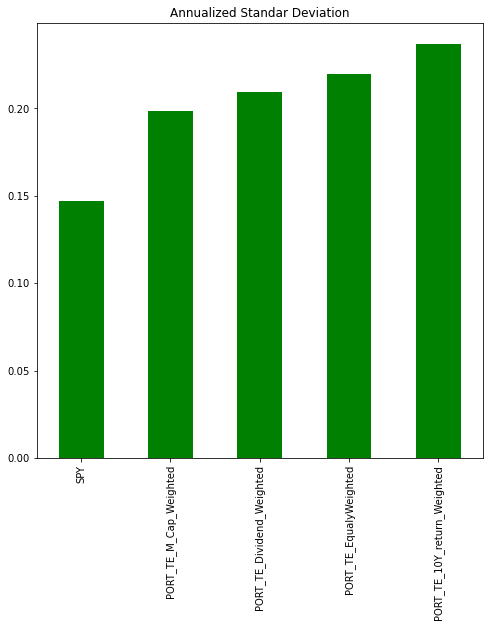

In [48]:
annualized_std.plot(kind="bar", title="Annualized Standar Deviation", figsize=(8, 8), color='green');

---

## **Rolling Statistics**

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### **Calculate and plot rolling `std` for all portfolios with 21-day window**

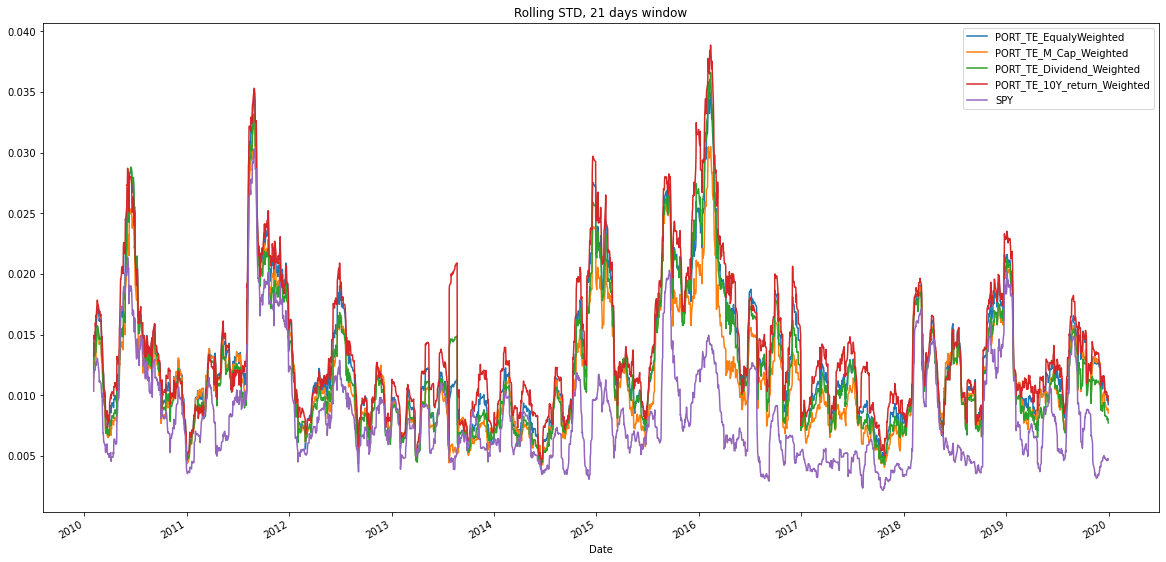

In [49]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

combined_trad.rolling(window=21).std().plot(figsize=(20,10), title = "Rolling STD, 21 days window");

#### **Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500**


In [50]:
# Calculate the correlation
# Display de correlation matrix

correlation = combined_trad.corr()
correlation

,PORT_TE_EqualyWeighted,PORT_TE_M_Cap_Weighted,PORT_TE_Dividend_Weighted,PORT_TE_10Y_return_Weighted,SPY
PORT_TE_EqualyWeighted,1.000000,0.975369,0.987452,0.977551,0.748340
PORT_TE_M_Cap_Weighted,0.975369,1.000000,0.967915,0.922834,0.763800
PORT_TE_Dividend_Weighted,0.987452,0.967915,1.000000,0.968976,0.744272
PORT_TE_10Y_return_Weighted,0.977551,0.922834,0.968976,1.000000,0.723330
SPY,0.748340,0.763800,0.744272,0.723330,1.000000


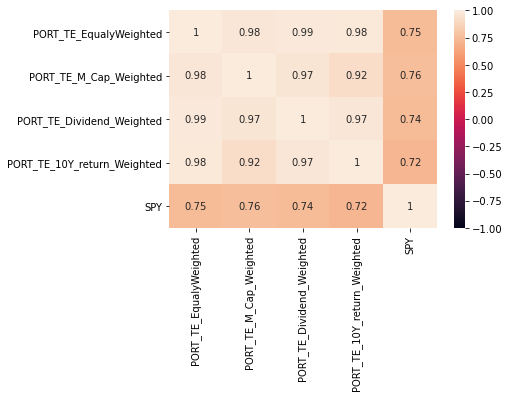

In [51]:
# Using 'heatmap` function to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True);

#### The stocks that follows the S&P 500 behavior  are XOM and CVX

### **Calculate and Plot Beta for a chosen portfolio and the S&P 500**
#### I choose portfolio Algo_1

In [52]:
# Calculate covariance of a single portfolio

PORT_TE_EqualyWeighted_cov = combined_trad['PORT_TE_EqualyWeighted'].cov(combined_trad['SPY'])

print(f"PORT_TE_EqualyWeighted_cov = {PORT_TE_EqualyWeighted_cov}")

PORT_TE_EqualyWeighted_cov = 9.612725129253125e-05


In [53]:
# Calculate variance of S&P 500

spy_variance = combined_trad['SPY'].var()

print(f"SPY Variance = {spy_variance}")

SPY Variance = 8.602654314896833e-05


In [54]:
# Computing beta
# Calculating beta of all daily returns of Algo 1

PORT_TE_EqualyWeighted_beta = PORT_TE_EqualyWeighted_cov / spy_variance

print(f"PORT_TE_EqualyWeighted_beta = {PORT_TE_EqualyWeighted_beta}")

PORT_TE_EqualyWeighted_beta = 1.1174138559313256


### **Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500**

#### I choose Portfolio Algo_1

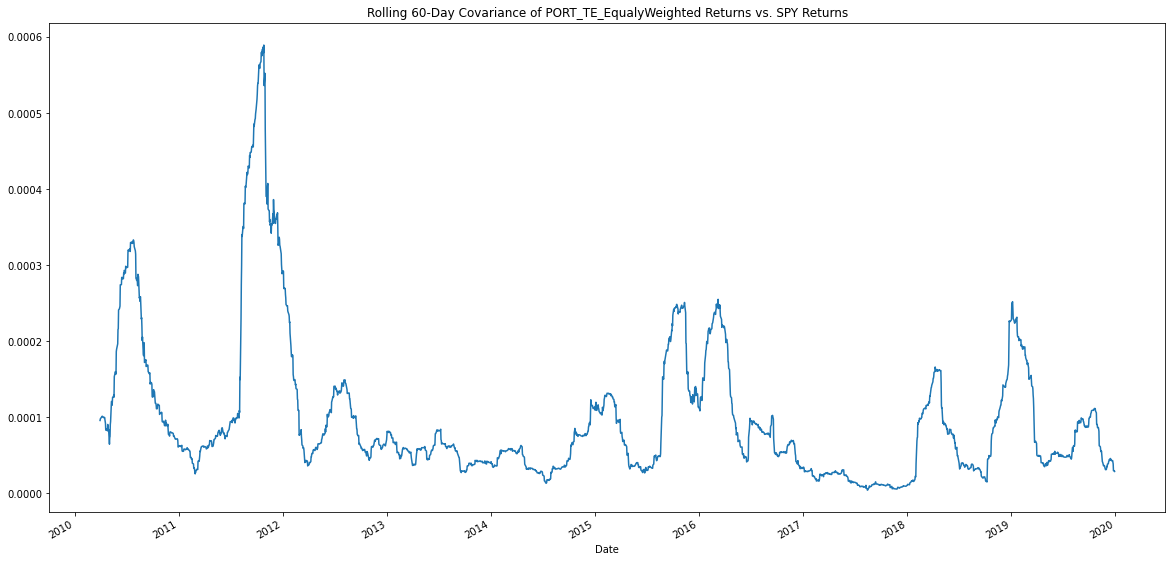

In [55]:
# Calculate 30-day rolling covariance of Algo 1 vs. S&P 500 and plot the data
rolling_covariance_60 = combined_trad['PORT_TE_EqualyWeighted'].rolling(window=60).cov(combined_trad['SPY'])
rolling_covariance_60.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of PORT_TE_EqualyWeighted Returns vs. SPY Returns');

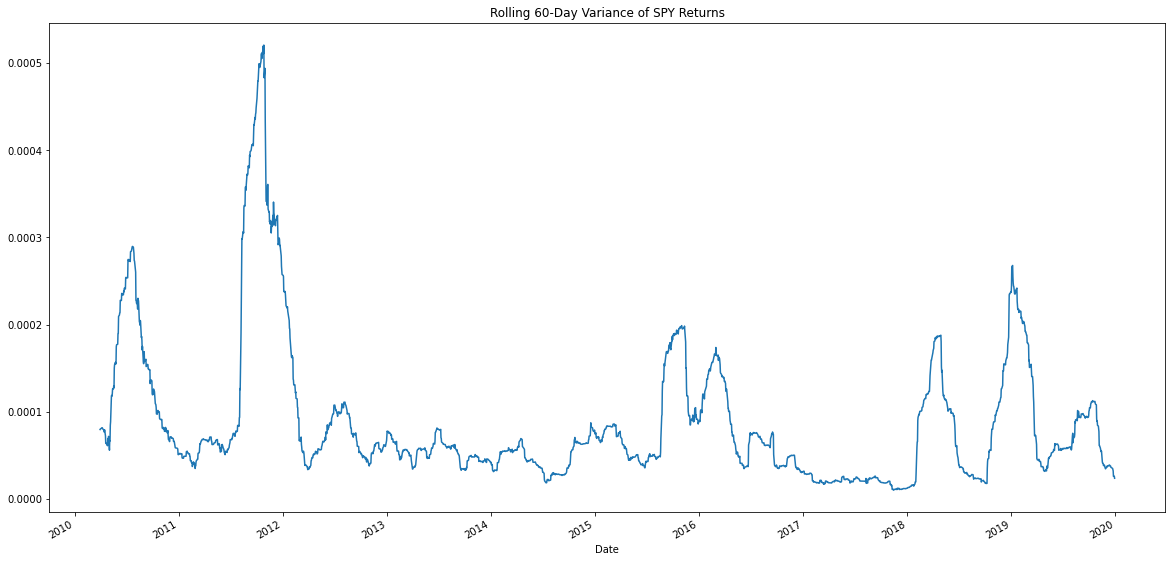

In [56]:
# Calculate 30-day rolling variance of Algo 1 vs. S&P 500 and plot the data
rolling_variance_60 = combined_trad['SPY'].rolling(window=60).var()
rolling_variance_60.plot(figsize=(20, 10), title='Rolling 60-Day Variance of SPY Returns');

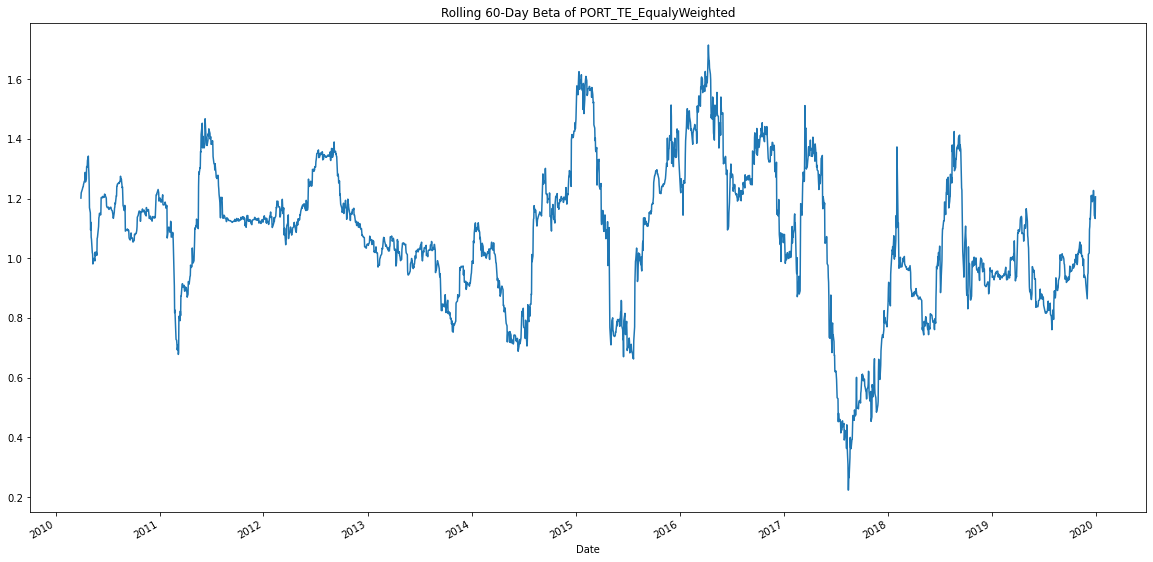

In [57]:
# Calculate 30-day rolling beta of Algo 1 and plot the data
rolling_beta_60 = rolling_covariance_60 / rolling_variance_60
rolling_beta_60.plot(figsize=(20, 10), title='Rolling 60-Day Beta of PORT_TE_EqualyWeighted');

### In the Rolling 60-Day Beta of Algo_1 vs S&P 500 we can see how disperse are Algo_1 data is from S&P500 data. Algo_1 has a high volatility and does not follow the Market(S&P 500) 

## **Rolling Statistics Challenge: Exponentially Weighted Average**

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

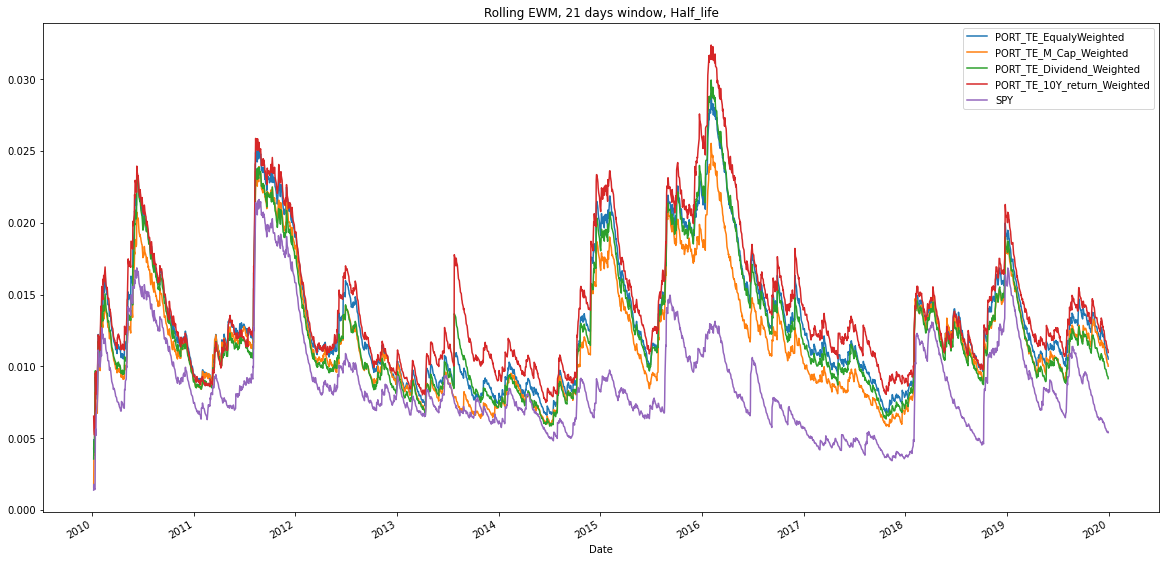

In [58]:
# Use `ewm` to calculate the rolling window
# https://www.statology.org/exponential-moving-average-pandas/

combined_trad.ewm(halflife=21).std().plot(figsize=(20,10), title='Rolling EWM, 21 days window, Half_life');

#### This Rolling EWN Plot also corraborate the high volatility for TGM_LLC and BH__Inc and the lowest volatility for P_&_Co_Inc

---

# **Sharpe Ratios**


### **Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot**

In [59]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_trad.mean()*252) / (combined_trad.std()*np.sqrt(252))
sharpe_ratios 

PORT_TE_EqualyWeighted         0.341808
PORT_TE_M_Cap_Weighted         0.233901
PORT_TE_Dividend_Weighted      0.337771
PORT_TE_10Y_return_Weighted    0.497207
SPY                            0.784263
dtype: float64

In [60]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.sort_values(inplace = True)
sharpe_ratios

PORT_TE_M_Cap_Weighted         0.233901
PORT_TE_Dividend_Weighted      0.337771
PORT_TE_EqualyWeighted         0.341808
PORT_TE_10Y_return_Weighted    0.497207
SPY                            0.784263
dtype: float64

In [61]:
sharpe_ratios.to_csv("sharpe_ratios_trad_energy.csv")

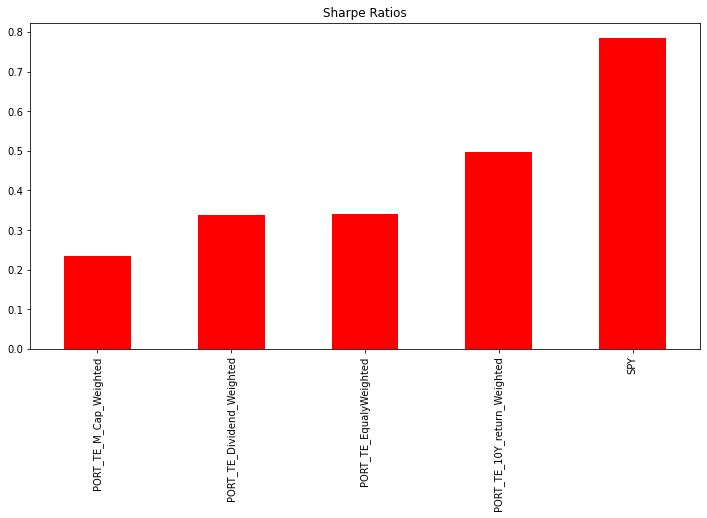

In [62]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", color='red', figsize=(12,6));

---

# Summary


### Data Analysis reflect that any of the combinations of this stocks will bring a good oportunity to investe in this Portafolio, due that any relation risk/reward is better than the one shown by S&P500 INDEX risk/reward.